In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

In [3]:
iris = load_iris()
print(iris.keys())
print([iris['target_names']])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]


In [6]:
x_org, y_org = iris.data, iris.target

print('원본 데이터 타입 :', type(x_org), type(y_org))
print(x_org.shape, y_org.shape)

원본 데이터 타입 : <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)


In [8]:
x_select = x_org[:,[0, 2]]

print(x_select.shape, y_org.shape)

(150, 2) (150,)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75, random_state=123
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [11]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

print(x_t0.shape, x_t1.shape, x_t2.shape)

(23, 2) (30, 2) (22, 2)


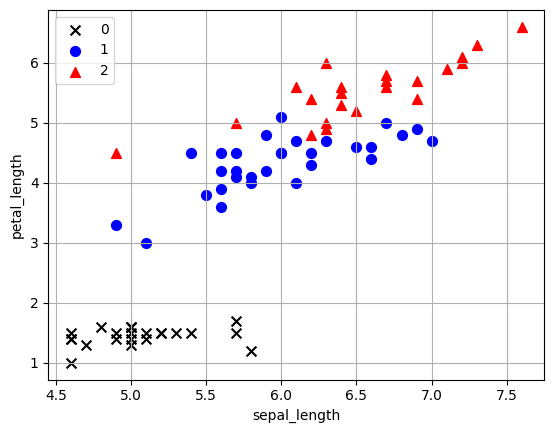

In [12]:
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='k', s=50, label='0')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='b', s=50, label='1')
plt.scatter(x_t2[:, 0], x_t2[:, 1], marker='^', c='r', s=50, label='2')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.grid()
plt.show()

In [19]:
n_input = x_train.shape[1]

n_output = len(list(set(y_train)))

print(n_input)
print(n_output)

2
3


In [21]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
net = Net(n_input, n_output)

In [22]:
for parameter in net.parameters():
    print(parameter)
    print()

Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)



In [25]:
print(net)
print(net.l1)

Net(
  (l1): Linear(in_features=2, out_features=3, bias=True)
)
Linear(in_features=2, out_features=3, bias=True)


In [26]:
summary(net, (2,), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [3]                       --
├─Linear: 1-1                            [3]                       9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [27]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [57]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

print(inputs.dtype)
print(labels.dtype)
print(inputs_test.dtype)
print(labels_test.dtype)

torch.float32
torch.int64
torch.float32
torch.int64


In [38]:
outputs = net(inputs)
loss = criterion(outputs, labels)

In [ ]:
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [54]:
print(torch.max(outputs, 1))

print(outputs.shape)

print(torch.max(outputs, 1)[1])
print(torch.max(outputs, 1)[1].shape)

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [55]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [58]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum() / len(labels)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum() / len(labels_test)

    if (epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.08564 acc: 0.40000 val_loss: 1.08839, val_acc: 0.26667
Epoch [10/10000], loss: 1.03241 acc: 0.40000 val_loss: 1.06115, val_acc: 0.26667
Epoch [20/10000], loss: 1.00187 acc: 0.40000 val_loss: 1.03034, val_acc: 0.26667
Epoch [30/10000], loss: 0.97402 acc: 0.40000 val_loss: 0.99965, val_acc: 0.26667
Epoch [40/10000], loss: 0.94805 acc: 0.42667 val_loss: 0.97070, val_acc: 0.26667
Epoch [50/10000], loss: 0.92381 acc: 0.52000 val_loss: 0.94369, val_acc: 0.41333
Epoch [60/10000], loss: 0.90119 acc: 0.69333 val_loss: 0.91854, val_acc: 0.58667
Epoch [70/10000], loss: 0.88007 acc: 0.70667 val_loss: 0.89514, val_acc: 0.60000
Epoch [80/10000], loss: 0.86036 acc: 0.70667 val_loss: 0.87334, val_acc: 0.61333
Epoch [90/10000], loss: 0.84194 acc: 0.70667 val_loss: 0.85304, val_acc: 0.62667
Epoch [100/10000], loss: 0.82473 acc: 0.70667 val_loss: 0.83411, val_acc: 0.62667
Epoch [110/10000], loss: 0.80862 acc: 0.72000 val_loss: 0.81644, val_acc: 0.62667
Epoch [120/10000], loss: 0.

In [60]:
print(history[0, 3], history[0, 4])
print(history[-1, 3], history[-1, 4])

1.088385820388794 0.2666666805744171
0.19794338941574097 0.9599999785423279


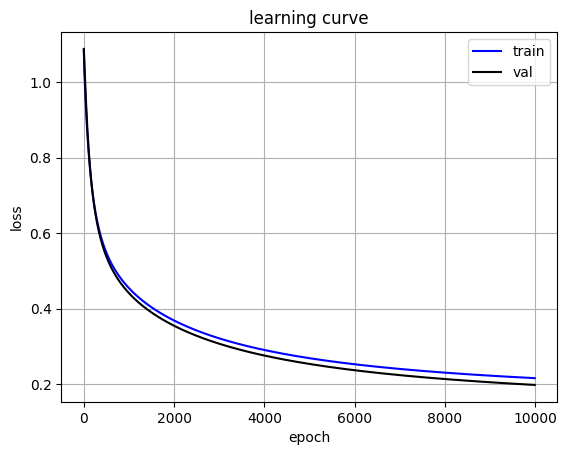

In [61]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve')
plt.legend()
plt.grid()
plt.show()

In [67]:
print(labels[[0, 2, 3]])

i3 = inputs[[0, 2, 3]]
print(i3.data.numpy())

tensor([1, 0, 2])
[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


In [73]:
softmax = nn.Softmax(dim=1)
o3 = net(i3)
print('o3 = \n', o3.data.numpy())
k3 = softmax(o3)
print('k3 = \n', k3.data.numpy())


o3 = 
 [[ 8.806987  14.19382   12.9985895]
 [12.826428   9.80011    0.173134 ]
 [ 6.795229  15.092856  17.111246 ]]
k3 = 
 [[3.50092258e-03 7.64987648e-01 2.31511414e-01]
 [9.53746080e-01 4.62508090e-02 3.04913578e-06]
 [2.92158275e-05 1.17282175e-01 8.82688582e-01]]


In [75]:
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0453, -2.5737],
        [ 1.3574,  0.8481],
        [-1.4027,  4.7255]])
tensor([ 1.7178,  1.6564, -0.3742])


In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    x_org, y_org, train_size=75, test_size=75, random_state=123
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 4) (75, 4) (75,) (75,)


In [80]:
n_input = x_train.shape[1]
print(n_input)

4


In [88]:
print(x_train[:5, :])

print(type(x_train))

[[6.3 3.3 4.7 1.6]
 [7.  3.2 4.7 1.4]
 [5.  3.  1.6 0.2]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 5.  1.9]]
<class 'numpy.ndarray'>


In [89]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

print(type(inputs))

<class 'torch.Tensor'>


In [90]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [91]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum() / len(labels)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum() / len(labels_test)

    if (epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09158, val_acc: 0.26667
Epoch [10/10000], loss: 1.01848 acc: 0.40000 val_loss: 1.04171, val_acc: 0.26667
Epoch [20/10000], loss: 0.96854 acc: 0.40000 val_loss: 0.98850, val_acc: 0.26667
Epoch [30/10000], loss: 0.92459 acc: 0.65333 val_loss: 0.93996, val_acc: 0.57333
Epoch [40/10000], loss: 0.88568 acc: 0.70667 val_loss: 0.89704, val_acc: 0.62667
Epoch [50/10000], loss: 0.85120 acc: 0.70667 val_loss: 0.85918, val_acc: 0.62667
Epoch [60/10000], loss: 0.82059 acc: 0.70667 val_loss: 0.82572, val_acc: 0.62667
Epoch [70/10000], loss: 0.79335 acc: 0.72000 val_loss: 0.79607, val_acc: 0.62667
Epoch [80/10000], loss: 0.76900 acc: 0.72000 val_loss: 0.76968, val_acc: 0.65333
Epoch [90/10000], loss: 0.74717 acc: 0.72000 val_loss: 0.74610, val_acc: 0.65333
Epoch [100/10000], loss: 0.72750 acc: 0.76000 val_loss: 0.72494, val_acc: 0.69333
Epoch [110/10000], loss: 0.70970 acc: 0.77333 val_loss: 0.70585, val_acc: 0.74667
Epoch [120/10000], loss: 0.

In [93]:
print(history[0, 3], history[0, 4])
print(history[-1, 3], history[-1, 4])

1.0915828943252563 0.2666666805744171
0.13723525404930115 0.9599999785423279


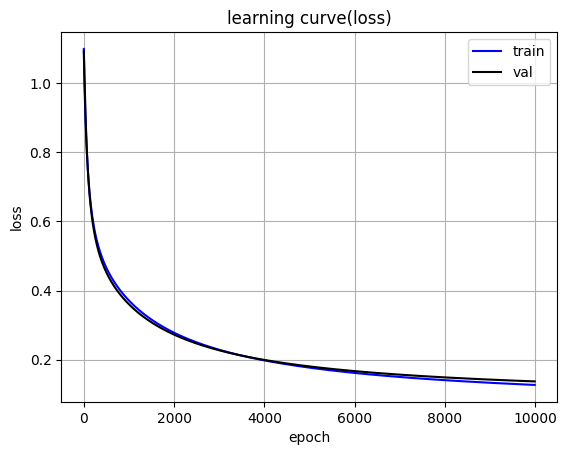

In [97]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve(loss)')
plt.legend()
plt.grid()
plt.show()

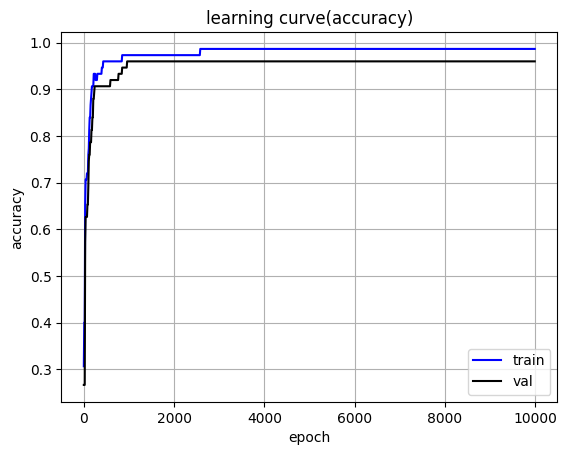

In [98]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('learning curve(accuracy)')
plt.legend()
plt.grid()
plt.show()

In [103]:
outputs_np = np.array(range(1, 13)).reshape((4, 3))
labels_np = np.array([0, 1, 2, 0])

outputs_dummy = torch.tensor(outputs_np).float()
labels_dummy = torch.tensor(labels_np).long()

print(outputs_dummy.data)
print(labels_dummy.data)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([0, 1, 2, 0])


In [106]:
nllloss = nn.NLLLoss()
loss = nllloss(outputs_dummy, labels_dummy)
print(loss.item())

-6.25


In [107]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.logsoftmax(x1)
        return x2

In [108]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [109]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum() / len(labels)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum() / len(labels_test)

    if (epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.31642 acc: 0.70667 val_loss: 1.46090, val_acc: 0.62667
Epoch [10/10000], loss: 1.06486 acc: 0.40000 val_loss: 1.12357, val_acc: 0.26667
Epoch [20/10000], loss: 1.00137 acc: 0.40000 val_loss: 1.03774, val_acc: 0.26667
Epoch [30/10000], loss: 0.95155 acc: 0.61333 val_loss: 0.97932, val_acc: 0.52000
Epoch [40/10000], loss: 0.90840 acc: 0.70667 val_loss: 0.92981, val_acc: 0.61333
Epoch [50/10000], loss: 0.87085 acc: 0.69333 val_loss: 0.88692, val_acc: 0.62667
Epoch [60/10000], loss: 0.83801 acc: 0.69333 val_loss: 0.84957, val_acc: 0.62667
Epoch [70/10000], loss: 0.80914 acc: 0.70667 val_loss: 0.81688, val_acc: 0.62667
Epoch [80/10000], loss: 0.78361 acc: 0.70667 val_loss: 0.78809, val_acc: 0.62667
Epoch [90/10000], loss: 0.76090 acc: 0.70667 val_loss: 0.76260, val_acc: 0.62667
Epoch [100/10000], loss: 0.74057 acc: 0.70667 val_loss: 0.73989, val_acc: 0.62667
Epoch [110/10000], loss: 0.72228 acc: 0.70667 val_loss: 0.71955, val_acc: 0.62667
Epoch [120/10000], loss: 0.

In [125]:
w = outputs[:5, :].data
print(w.numpy())

print(torch.exp(w).numpy())
print('pred :', torch.exp(w).numpy().argmax(1))
print('true :', labels[:5].numpy())

[[ -4.9765387   -0.10552942  -2.372427  ]
 [ -4.904997    -0.02324719  -4.162439  ]
 [ -0.06007695  -2.842019   -16.1449    ]
 [-11.652627    -3.1732805   -0.04277676]
 [ -9.199668    -1.6851801   -0.20519571]]
[[6.8978975e-03 8.9984798e-01 9.3254127e-02]
 [7.4094664e-03 9.7702092e-01 1.5569540e-02]
 [9.4169205e-01 5.8307819e-02 9.7355233e-08]
 [8.6961772e-06 4.1866031e-02 9.5812523e-01]
 [1.0107296e-04 1.8541104e-01 8.1448787e-01]]
pred : [1 1 0 2 2]
true : [1 1 0 2 2]


In [126]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.softmax = nn.Softmax(dim=1)

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.softmax(x1)
        return x2

In [127]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [128]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    outputs2 = torch.log(outputs)
    loss = criterion(outputs2, labels)
    loss.backward()
    optimizer.step()

    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    outputs_test = net(inputs_test)
    outputs2_test = torch.log(outputs_test)
    loss_test = criterion(outputs2_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09158, val_acc: 0.26667
Epoch [10/10000], loss: 1.01848 acc: 0.40000 val_loss: 1.04171, val_acc: 0.26667
Epoch [20/10000], loss: 0.96854 acc: 0.40000 val_loss: 0.98850, val_acc: 0.26667
Epoch [30/10000], loss: 0.92459 acc: 0.65333 val_loss: 0.93996, val_acc: 0.57333
Epoch [40/10000], loss: 0.88568 acc: 0.70667 val_loss: 0.89704, val_acc: 0.62667
Epoch [50/10000], loss: 0.85120 acc: 0.70667 val_loss: 0.85918, val_acc: 0.62667
Epoch [60/10000], loss: 0.82059 acc: 0.70667 val_loss: 0.82572, val_acc: 0.62667
Epoch [70/10000], loss: 0.79335 acc: 0.72000 val_loss: 0.79607, val_acc: 0.62667
Epoch [80/10000], loss: 0.76900 acc: 0.72000 val_loss: 0.76968, val_acc: 0.65333
Epoch [90/10000], loss: 0.74717 acc: 0.72000 val_loss: 0.74610, val_acc: 0.65333
Epoch [100/10000], loss: 0.72750 acc: 0.76000 val_loss: 0.72494, val_acc: 0.69333
Epoch [110/10000], loss: 0.70970 acc: 0.77333 val_loss: 0.70585, val_acc: 0.74667
Epoch [120/10000], loss: 0.

In [149]:
w = outputs[:5].data.numpy()

print(w)
print(w.argmax(1))
print(labels[:5].numpy())

[[5.9267934e-03 9.0560114e-01 8.8472039e-02]
 [6.8745581e-03 9.7919959e-01 1.3925901e-02]
 [9.4523501e-01 5.4764912e-02 8.8718252e-08]
 [7.6459364e-06 4.0360752e-02 9.5963156e-01]
 [9.7765958e-05 1.7429739e-01 8.2560480e-01]]
[1 1 0 2 2]
[1 1 0 2 2]
